In [11]:
import pandas as pd
import numpy as np
import os

### Initial Data Collection

In this project, the initial data was collected from multiple excel spreadsheets released by the Brewery Laboratory over a period of 6 years. Each excel worksheet comprised data from the current Yearly Quarter and was separated by a different tab for each day of the quarter with the tab named for the date. 

Each tab needed to be cleaned and formatted in order to assemble all the data into one usable dataset. Above the column headers, the date for each sheet was added to its own row. This needed to be removed to have uniform columns.

Some tabs had errant information on the side, creating extra unnessecary columns that needed to be removed.

Additionally, each row needed it's own date specific column for use when all the data was concatenated into one set.

Below is an example of one tab from one worksheet.


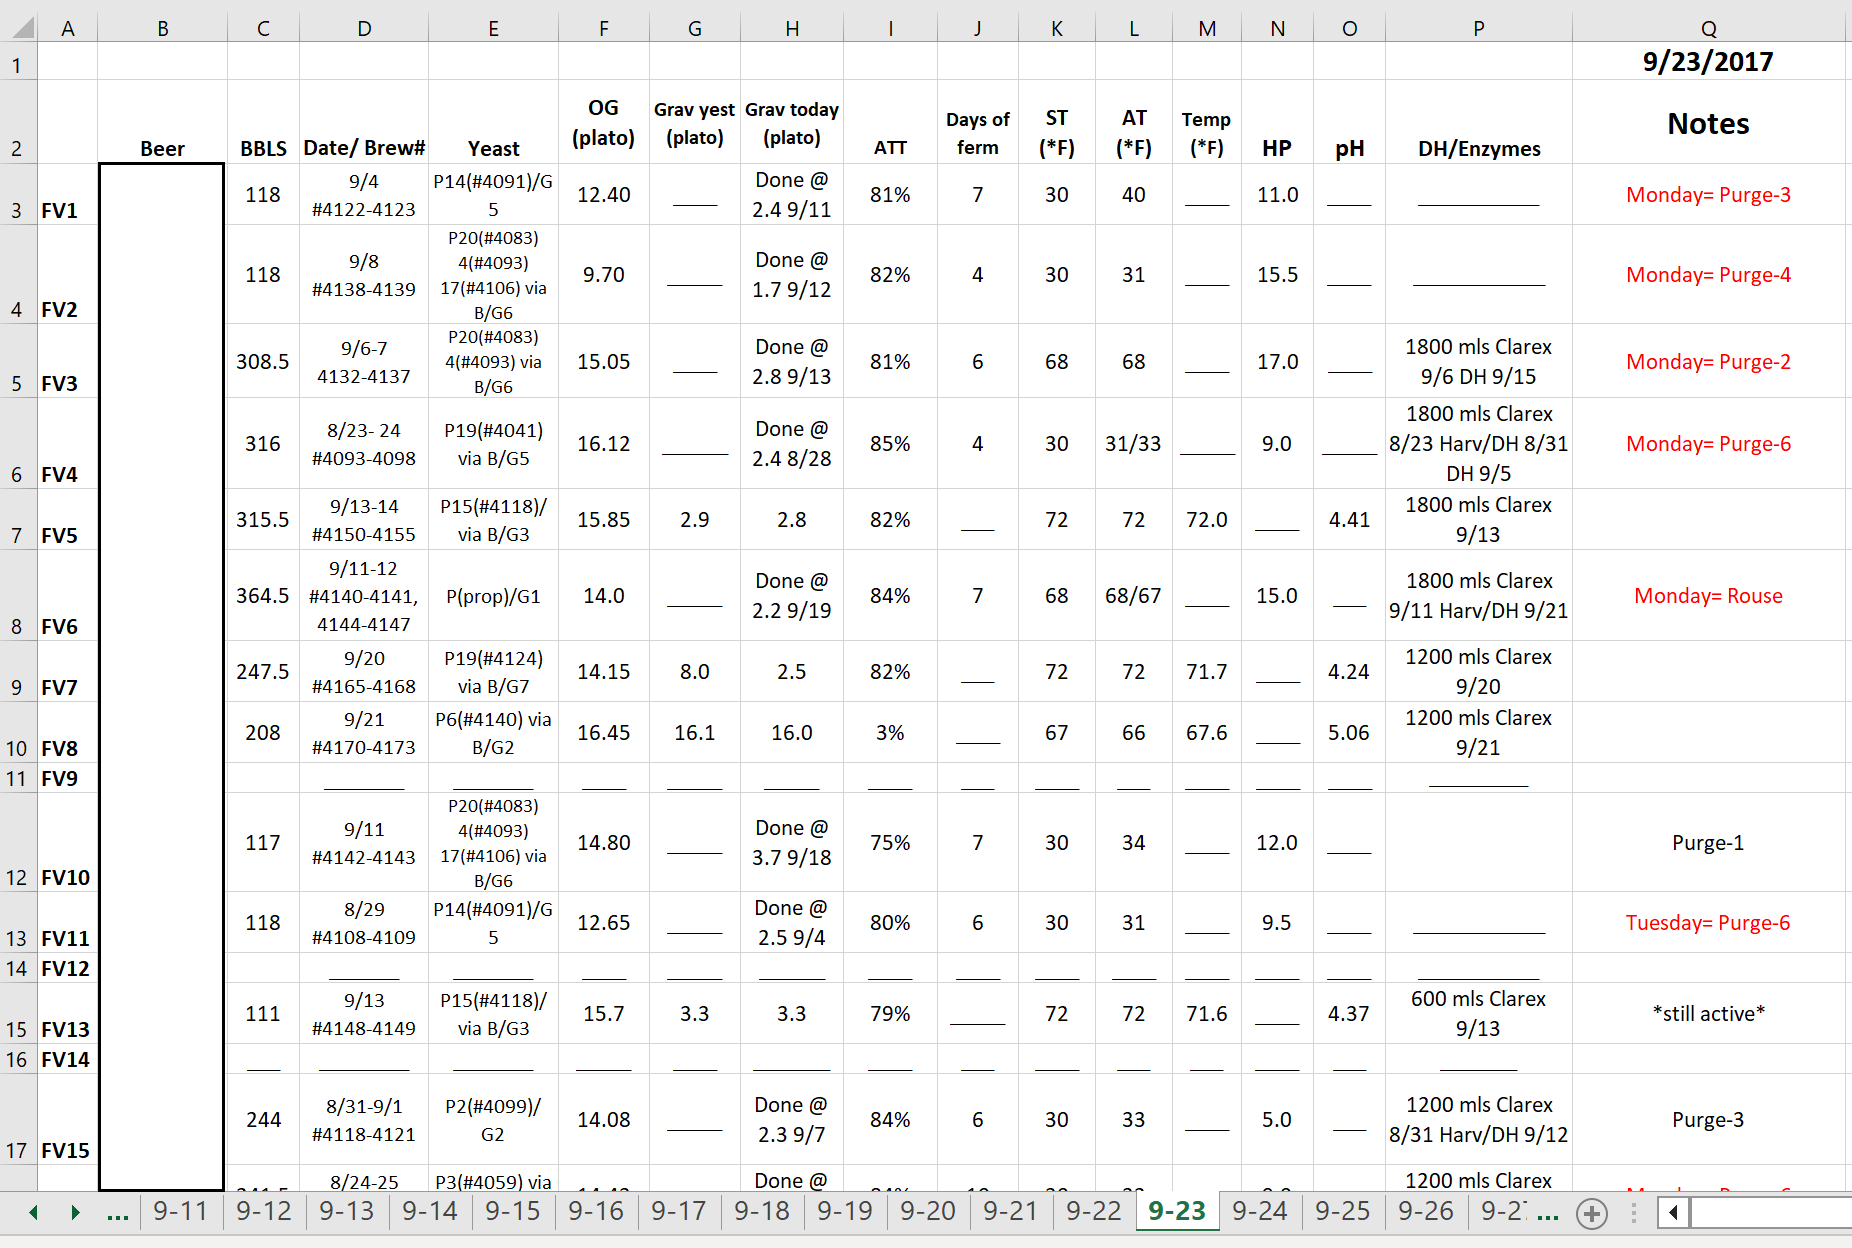

### Prepping data for concatenation

The following function iterates through all the raw files, removing the top row, resetting the column headers, selecting only the necessary columns, adding a date column comprised of the date on the tab and the year on the filename.

The result of each iteration was concatenated to a master DataFrame.

Master DataFrame was exported to an Excel File for data cleaning and analysis

In [13]:
cur_dir = 'C:\\Users\\dougy\\Data Practice\\Ferment_Lag_Data_Proj\\raw_files\\'
df_master = pd.DataFrame()
for file in os.listdir('C:\\Users\\dougy\\Data Practice\\Ferment_Lag_Data_Proj\\raw_files'):
    print(f'Processing file: {cur_dir + file}')
    df = pd.ExcelFile(cur_dir + file)
    sheet_list = df.sheet_names
    for sheet in sheet_list:
        df = pd.read_excel(cur_dir + file, sheet_name = sheet, header = 1)
        df = df[df.columns[:16]]
        df['date'] = sheet + '-'  +(file).split(' ')[2]

        df_master = pd.concat([df_master,df],axis=0)

print('Process Complete!')
print('')
print('Writing to file...')
        
df_master.to_excel('C:\\Users\\dougy\\Data Practice\\Ferment_Lag_Data_Proj\\master_data_file\\master_data.xlsx', sheet_name='data', index=False)

print('File finished!')

Processing file: C:\Users\dougy\Data Practice\Ferment_Lag_Data_Proj\raw_files\Beer Happenings 2016 Q3.xlsx
Processing file: C:\Users\dougy\Data Practice\Ferment_Lag_Data_Proj\raw_files\Beer Happenings 2016 Q4.xlsx
Processing file: C:\Users\dougy\Data Practice\Ferment_Lag_Data_Proj\raw_files\Beer Happenings 2017 Q1.xlsx
Processing file: C:\Users\dougy\Data Practice\Ferment_Lag_Data_Proj\raw_files\Beer Happenings 2017 Q2.xlsx
Processing file: C:\Users\dougy\Data Practice\Ferment_Lag_Data_Proj\raw_files\Beer Happenings 2017 Q3.xlsx
Processing file: C:\Users\dougy\Data Practice\Ferment_Lag_Data_Proj\raw_files\Beer Happenings 2017 Q4.xlsx
Processing file: C:\Users\dougy\Data Practice\Ferment_Lag_Data_Proj\raw_files\Beer Happenings 2018 Q1.xlsx
Processing file: C:\Users\dougy\Data Practice\Ferment_Lag_Data_Proj\raw_files\Beer Happenings 2018 Q2.xlsx
Processing file: C:\Users\dougy\Data Practice\Ferment_Lag_Data_Proj\raw_files\Beer Happenings 2018 Q3.xlsx
Processing file: C:\Users\dougy\Data 

### Finished Master Dataset

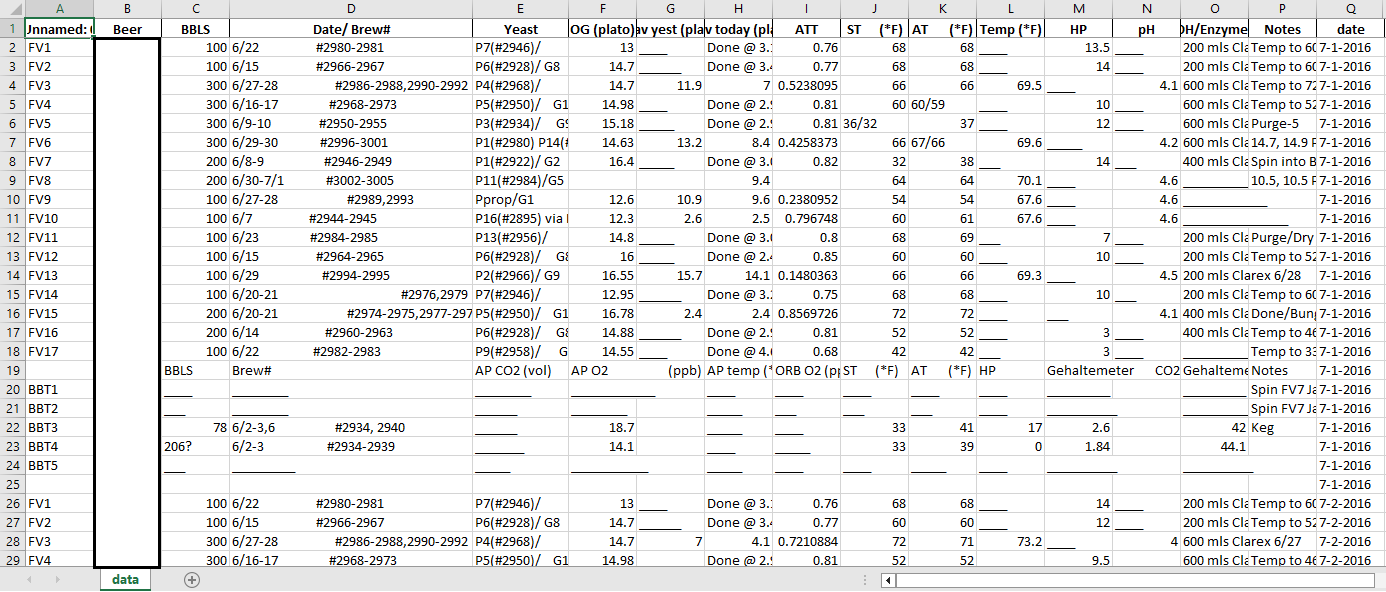